## Generating synthetic dataset

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Generate synthetic dataset
np.random.seed(42)

num_samples = 1000
data = pd.DataFrame({
    'age': np.random.randint(18, 70, size=num_samples),
    'income': np.random.randint(20000, 100000, size=num_samples),
    'loan_amount': np.random.randint(1000, 50000, size=num_samples),
    'loan_duration': np.random.randint(1, 30, size=num_samples),
    'default': np.random.choice([0, 1], size=num_samples, p=[0.8, 0.2])
})

# Display first few rows of the dataset
data.head()


,age,income,loan_amount,loan_duration,default
0,56,54674,48055,25,0
1,69,55854,47733,3,1
2,46,66271,20508,1,0
3,32,93688,43287,4,0
4,60,58518,14380,25,0


## Data Pre-processing

In [ ]:
data.isnull().sum()

X = data.drop('default', axis=1)
y = data['default']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## Model Development and Evaluation

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.8
Confusion Matrix:
[[240   8]
 [ 52   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89       248
           1       0.00      0.00      0.00        52

    accuracy                           0.80       300
   macro avg       0.41      0.48      0.44       300
weighted avg       0.68      0.80      0.73       300



## Feature Importance

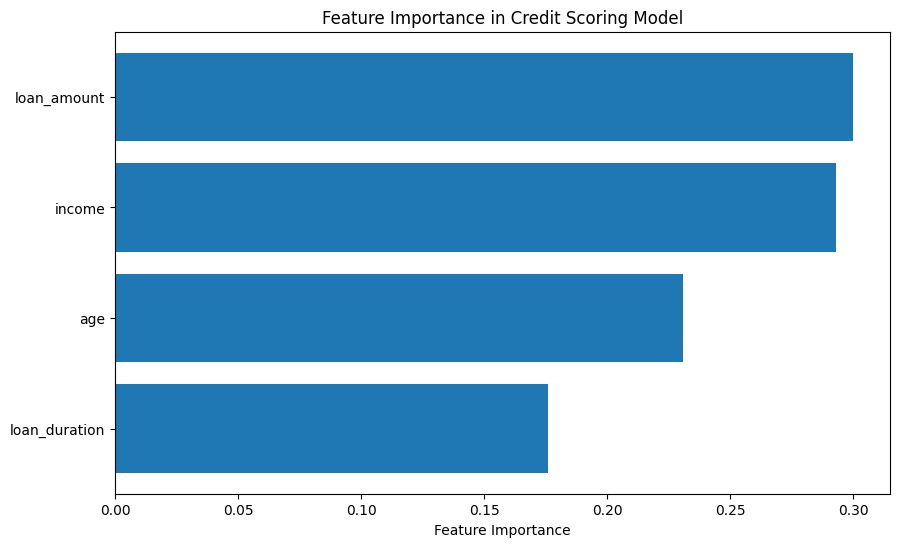

In [ ]:
feature_importances = model.feature_importances_
features = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Credit Scoring Model')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
import joblib

# Save the model
joblib.dump(model, 'credit_scoring_model.pkl')

['credit_scoring_model.pkl']

## Using Gradient Boosting along with Hyperparameter tuning

ROC-AUC Score: 0.8295646699046592
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       218
           1       0.87      0.79      0.83       255

    accuracy                           0.83       473
   macro avg       0.83      0.83      0.83       473
weighted avg       0.83      0.83      0.83       473



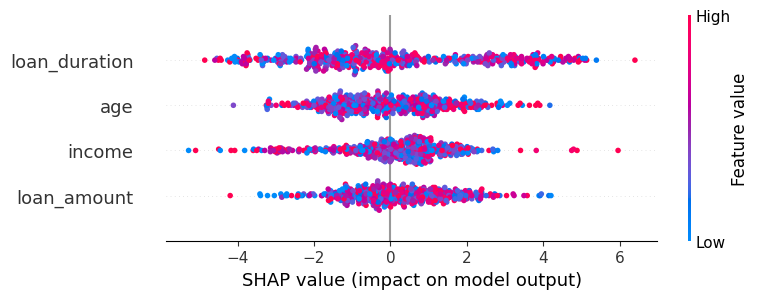

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, classification_report
from imblearn.over_sampling import SMOTE
import shap

# Load dataset
data = pd.DataFrame({
    'age': np.random.randint(18, 70, size=num_samples),
    'income': np.random.randint(20000, 100000, size=num_samples),
    'loan_amount': np.random.randint(1000, 50000, size=num_samples),
    'loan_duration': np.random.randint(1, 30, size=num_samples),
    'default': np.random.choice([0, 1], size=num_samples, p=[0.8, 0.2])
})

# Handling missing values
data.fillna(data.median(), inplace=True)

# Feature scaling
scaler = StandardScaler()
data[['age', 'income', 'loan_amount', 'loan_duration']] = scaler.fit_transform(data[['age', 'income', 'loan_amount', 'loan_duration']])

# Feature and target split
X = data.drop('default', axis=1)
y = data['default']

# Addressing class imbalance
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

# Model training with hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
model = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='roc_auc', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Predictions and evaluation
y_pred = best_model.predict(X_test)
roc_auc = roc_auc_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"ROC-AUC Score: {roc_auc}")
print("Classification Report:")
print(class_report)

# SHAP values for interpretability
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)


## Gradient boosting with real dataset

In [26]:
import pandas as pd
import numpy as np

data = pd.read_csv("/content/CreditWorthiness.csv")

data['creditScore'].value_counts()

creditScore
good    700
bad     300
Name: count, dtype: int64

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv("/content/CreditWorthiness.csv")

features = ['age', 'Cdur', 'Camt', 'NumCred', 'Cbal', 'Chist', 'Cpur', 'Sbal', 'Edur', 'InRate', 'MSG', 'Oparties', 'JobType', 'creditScore', 'Rdur']
data = data[features]

# Convert categorical features to numeric
data = pd.get_dummies(data, columns=['Cbal', 'Chist', 'Cpur', 'Sbal', 'Edur', 'MSG', 'Oparties', 'JobType', 'Rdur'])

# Split data into features and target
X = data.drop('creditScore', axis=1)
y = data['creditScore']

# Convert target variable to numerical
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y) # good -> 1, bad -> 0

# Standardize numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[['age', 'Cdur', 'Camt', 'NumCred', 'InRate']] = scaler.fit_transform(X[['age', 'Cdur', 'Camt', 'NumCred', 'InRate']])

# Resampling data as good:bad is 700:300
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

# Train a Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

model = GradientBoostingClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Set up Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Evaluation
from sklearn.metrics import roc_auc_score, classification_report

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best ROC-AUC Score from Grid Search: {best_score}")

# Evaluate on test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC Score on Test Data: {roc_auc}")

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Best ROC-AUC Score from Grid Search: 0.9022262843638817
ROC-AUC Score on Test Data: 0.8334882877162747


In [5]:
class_report = classification_report(y_test, y_pred)

print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.80      0.83       211
           1       0.81      0.87      0.84       209

    accuracy                           0.83       420
   macro avg       0.83      0.83      0.83       420
weighted avg       0.83      0.83      0.83       420



In [6]:
import joblib

joblib.dump(best_model, 'credit_scoring.pkl')

['credit_scoring.pkl']

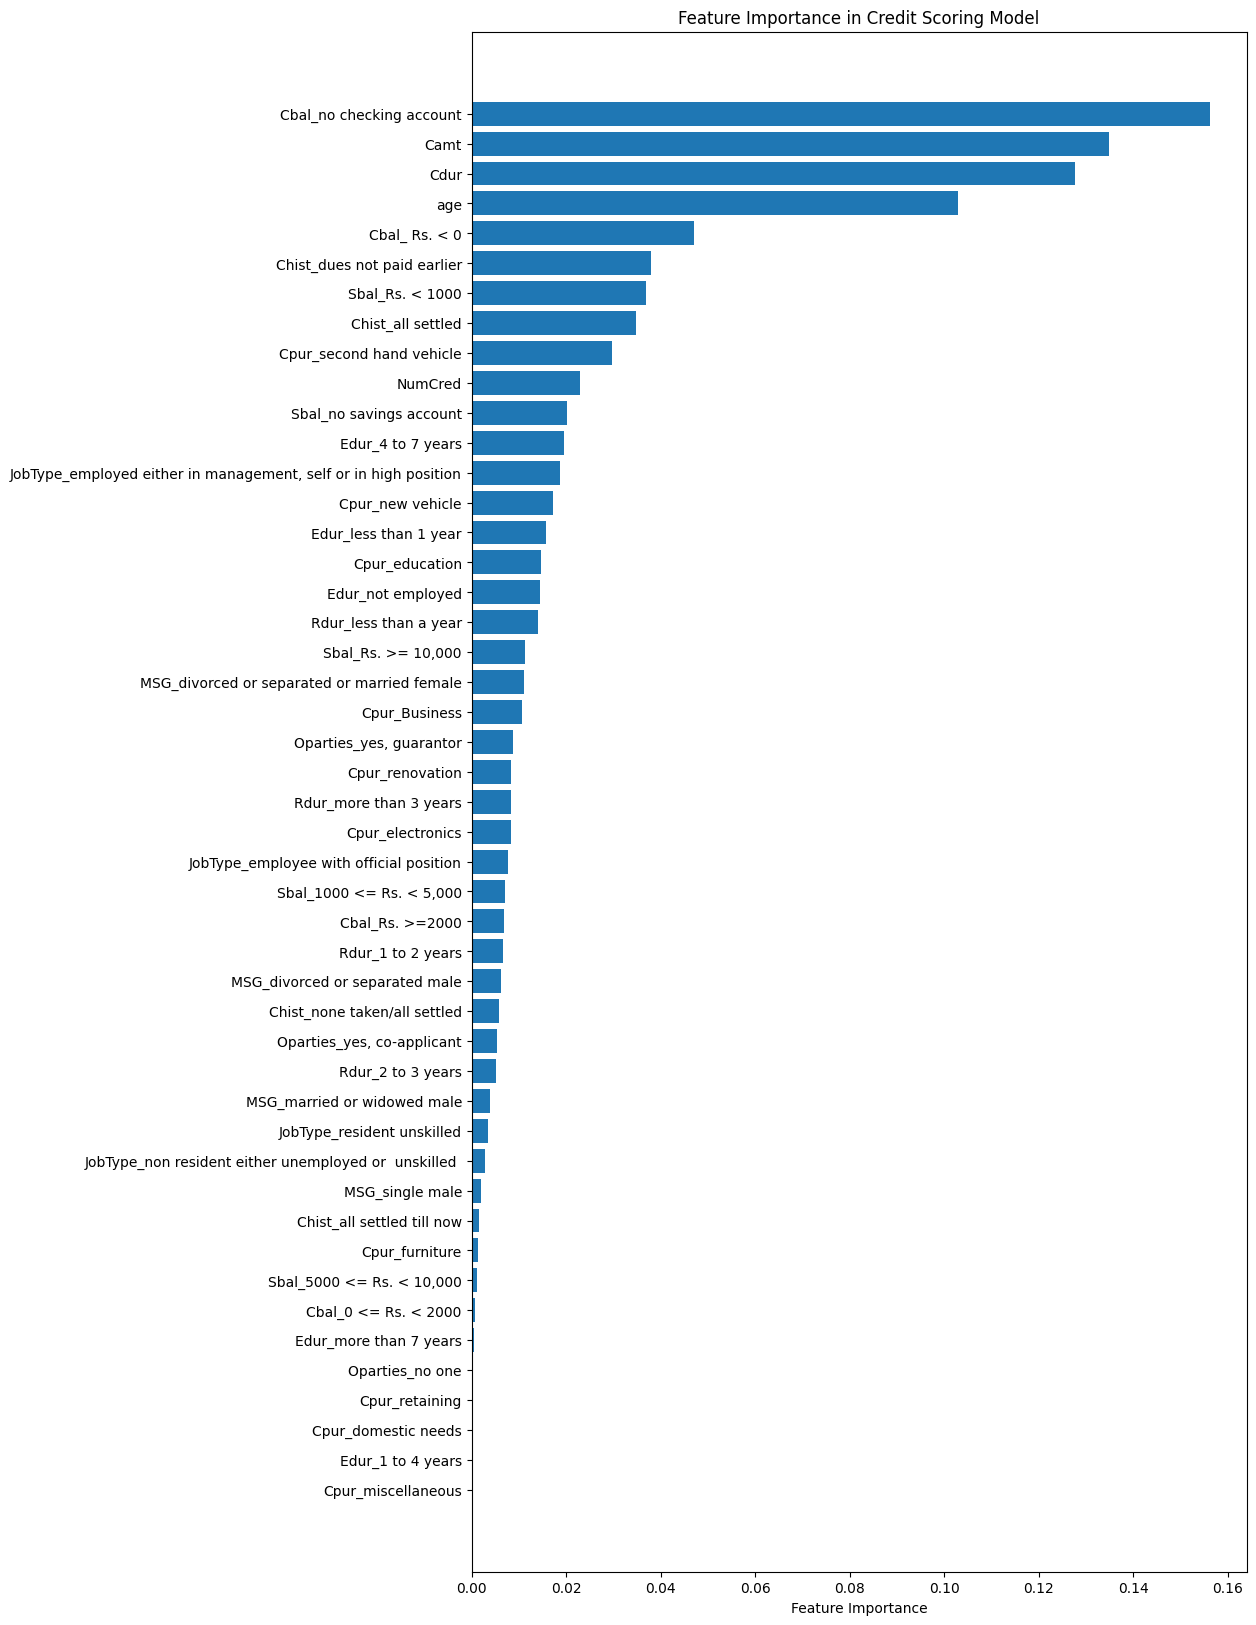

In [ ]:
feature_importances = model.feature_importances_
features = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 20))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Credit Scoring Model')
plt.gca().invert_yaxis()
plt.show()

## Random forest with real dataset

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

data = pd.read_csv("/content/CreditWorthiness.csv")

features = ['age', 'Cdur', 'Camt', 'NumCred', 'Cbal', 'Chist', 'Cpur', 'Sbal', 'Edur', 'MSG', 'Oparties', 'JobType', 'creditScore', 'Rdur']
data = data[features]

# Convert categorical features to numeric
data = pd.get_dummies(data, columns=['Cbal', 'Chist', 'Cpur', 'Sbal', 'Edur', 'MSG', 'Oparties', 'JobType', 'Rdur'])

# Split data into features and target
X = data.drop('creditScore', axis=1)
y = data['creditScore']

# Convert target variable to numerical
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y) # good -> 1, bad -> 0

# Resampling data as good:bad is 700:300
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"ROC_AUC: {roc_auc_score(y_test, y_pred)}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.819047619047619
ROC_AUC: 0.8192929544887638
Confusion Matrix:
[[162  49]
 [ 27 182]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.77      0.81       211
           1       0.79      0.87      0.83       209

    accuracy                           0.82       420
   macro avg       0.82      0.82      0.82       420
weighted avg       0.82      0.82      0.82       420

